## Problem 1

In [178]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [179]:
# read in data
T = np.genfromtxt('../allsky_sample.csv', names=True, delimiter=',')

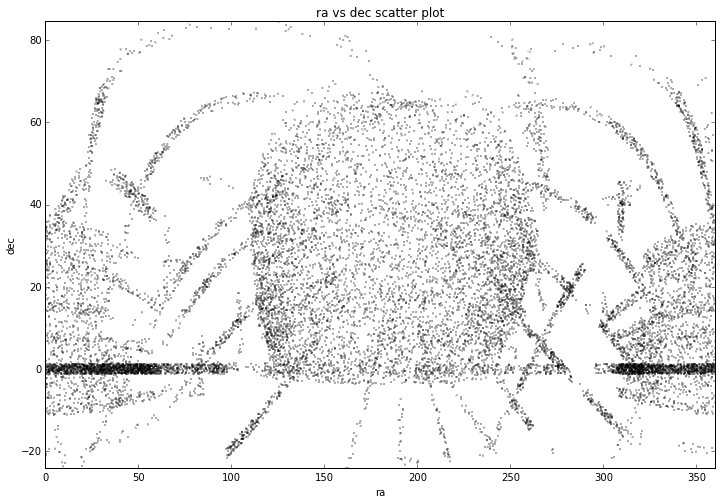

In [180]:
# ra vs dec scatter plot
fig, ax = subplots(figsize=(12,8))
ax.scatter(T['ra'], T['dec'], marker='.', s=0.1)
ax.invert_xaxis() # ra should be inverted
ax.axis([np.amin(T['ra']),np.amax(T['ra']),np.amin(T['dec']),np.amax(T['dec'])])
ax.set_title('ra vs dec scatter plot')
ax.set_xlabel('ra')
ax.set_ylabel('dec');

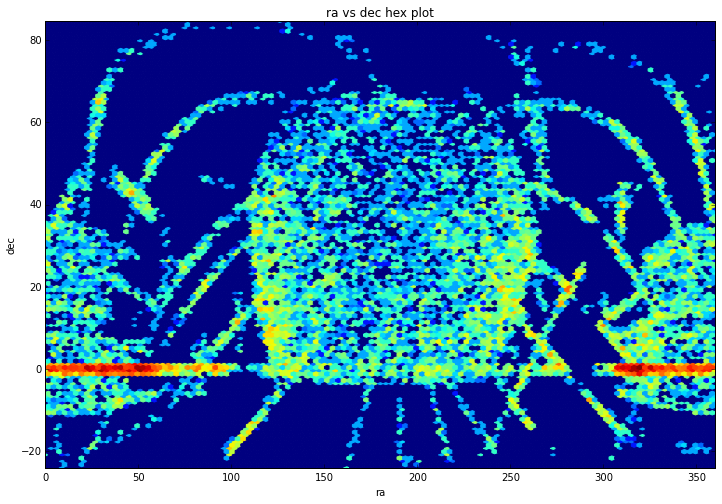

In [181]:
# ra vs dec hex plot
fig, ax = subplots(figsize=(12,8))
plt.hexbin(T['ra'], T['dec'],bins='log', gridsize=120, cmap=plt.cm.jet)
ax.invert_xaxis() # ra should be inverted
ax.axis([np.amin(T['ra']),np.amax(T['ra']),np.amin(T['dec']),np.amax(T['dec'])])
ax.set_title('ra vs dec hex plot')
ax.set_xlabel('ra')
ax.set_ylabel('dec');

## Problem 2

In [182]:
def equgal(ra,dec):
    # convert equatorial to Galactic coordinates (degrees to degrees)
    # convert everything to radians
    r = np.radians(ra)
    d = np.radians(dec)
    c1 = np.radians(62.6)
    c2 = np.radians(282.25)
    # compute l and b
    b = arcsin((np.sin(d) * np.cos(c1)) - (np.cos(d) * np.sin(r-c2) * np.sin(c1)))
    l = arccos((np.cos(d)*np.cos(r-c2))/np.cos(b)) + np.radians(33)
    
    return np.degrees(l),np.degrees(b)

In [183]:
# make l, b array
l,b = equgal(T['ra'],T['dec'])

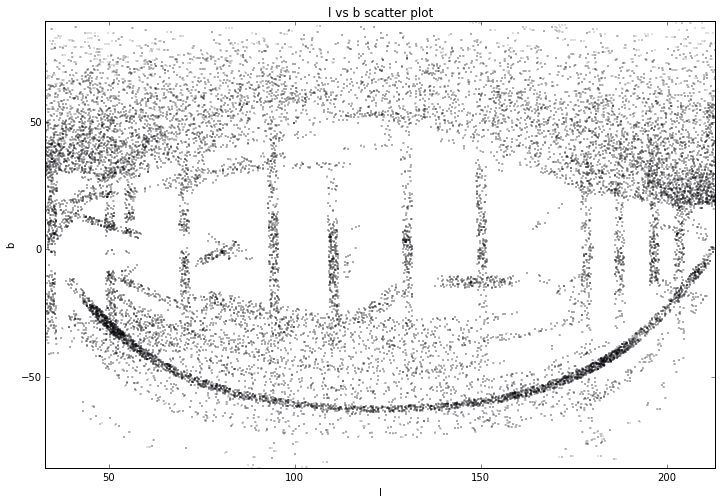

In [184]:
# l vs b scatter plot
fig, ax = subplots(figsize=(12,8))
ax.scatter(l,b, marker='.', s=0.1)
ax.invert_xaxis() # l should be inverted
axis([np.amin(l),np.amax(l),np.amin(b),np.amax(b)])
ax.set_title('l vs b scatter plot')
ax.set_xlabel('l')
ax.set_ylabel('b');

In [185]:
# ra and dec for closest 5 objects
close = np.argsort(np.abs(b))
print "     ra            dec"
print np.transpose(np.array([[T['ra'][close][0:5]],[T['dec'][close][0:5]]]))

     ra            dec
[[[  30.32108368   61.41147037]]

 [[  30.31963128   61.41278392]]

 [[  25.49209167   61.95064133]]

 [[ 307.86959285   39.80978861]]

 [[  30.32164964   61.41433807]]]


## Problem 3

In [186]:
# function to find the Great circle distance between two objects
def gc_dist(lon1,lat1,lon2,lat2):
    # convert everything to radians
    lon1 = np.radians(lon1)
    lat1 = np.radians(lat1)
    lon2 = np.radians(lon2)
    lat2 = np.radians(lat2)
    dlon = lon2-lon1 # delta longitude
    dist = np.arctan2(sqrt((np.cos(lat2)*np.sin(dlon))**2 + (np.cos(lat1)*np.sin(lat2)-
                    np.sin(lat1)*np.cos(lat2)*np.cos(dlon))**2),
                    (np.sin(lat1)*np.sin(lat2) + np.cos(lat1)*np.cos(lat2)*np.cos(dlon) ))
    return np.degrees(dist) # return in degrees

In [187]:
# import small dataset
D = np.genfromtxt('../small_sdss.csv', names=True, delimiter=',')

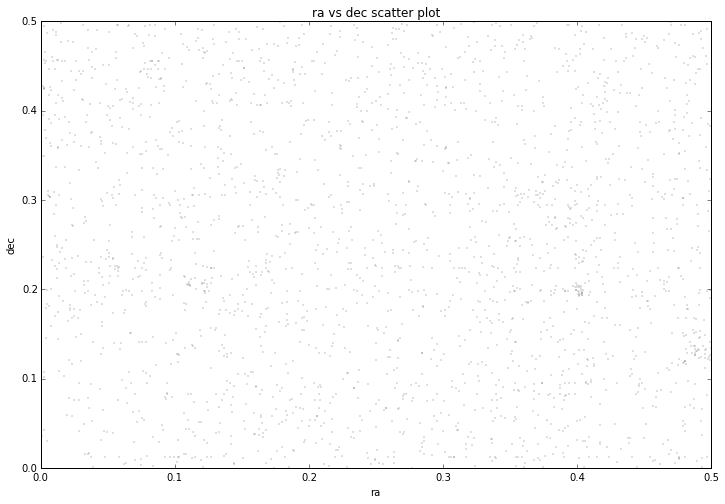

In [188]:
# ra vs dec plot for small dataset
fig, ax = subplots(figsize=(12,8))
ax.scatter(D['ra'], D['dec'], marker='.', s=0.1)
ax.invert_xaxis() # ra should be inverted
ax.axis([np.amin(D['ra']),np.amax(D['ra']),np.amin(D['dec']),np.amax(D['dec'])])
ax.set_title('ra vs dec scatter plot')
ax.set_xlabel('ra')
ax.set_ylabel('dec');

In [189]:
X = np.triu_indices(size(D),1) # pair of index arrays for elementwise computation 
L,B = equgal(D['ra'],D['dec']) # convert equatorial to galactic
dist = gc_dist(L[X[0][:]],B[X[0][:]],L[X[1][:]],B[X[1][:]]) # compute distances

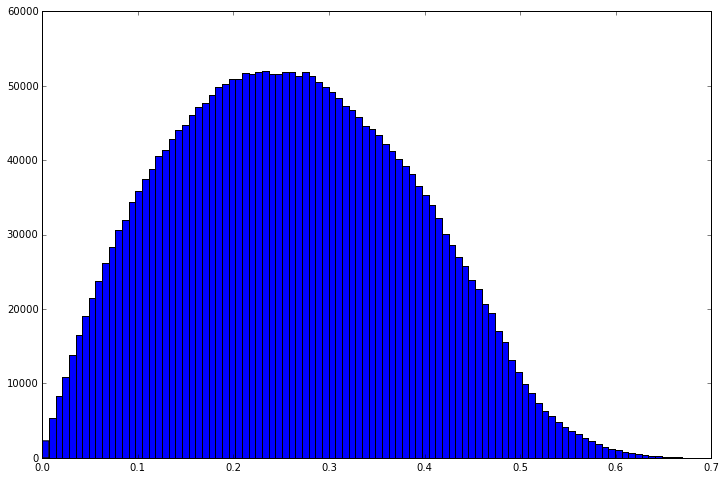

In [190]:
# plot histogram for all distance pairs
fig, ax = subplots(figsize=(12,8))
ax.hist(dist,bins=100,range=None);

In [300]:
## The distribution will always be Poisson distribution as shown below.
Z = np.random.rand(2,2320)/2
tr = np.triu_indices(2320,1)
L2,B2 = equgal(Z[0,:],Z[1,:]) # convert equatorial to galactic
dist2 = gc_dist(L2[tr[0][:]],B2[tr[0][:]],L2[tr[1][:]],B2[tr[1][:]]) # compute distances

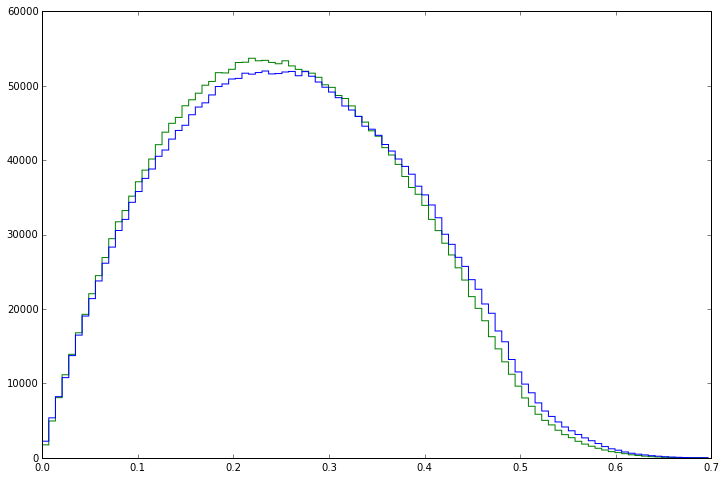

In [301]:
# plot histogram for SDSS data with random data on top of eachother
# to show that the distributioin will always be the same
fig, ax = subplots(figsize=(12,8))
ax.hist([dist,dist2],bins=100,histtype='step');